# Training neural nets

In [1]:
!pip install gdown

In [2]:
!gdown https://drive.google.com/uc?id=1fFKvR46KP-tFEUuoc1FOs_y0HROLkVeb

Downloading...
From: https://drive.google.com/uc?id=1fFKvR46KP-tFEUuoc1FOs_y0HROLkVeb
To: /content/train_meta.pkl
689MB [00:04, 155MB/s]


In [ ]:
!mkdir -p data
!mv train_meta.pkl data/

In [4]:
from WikiSeriesNN import WikiSeriesNN

from WikiPlot import plot_prediction
from Seq2SeqConv import Seq2SeqConv
from Seq2SeqConvFull import Seq2SeqConvFull
from Seq2Seq import Seq2Seq
from os import path
import pickle
from PerformanceMetrics import smape

Using TensorFlow backend.


In [ ]:
root_folder = "./data"
train_file = path.join(root_folder,"train_meta.pkl")

## Training Standard Seq2Seq

In [7]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [8]:
seq2seq = Seq2Seq(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60


W0623 09:27:03.953670 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 09:27:03.984871 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 09:27:03.992442 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 09:27:04.094428 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0623 09:27:04.106975 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, 50), (None,  10400       input_1[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, None, 50), ( 10400       input_2[0][0]                    
                                                                 lstm_1[0][1]                     
          

In [9]:
seq2seq.fit(epochs=10)

W0623 09:27:04.595389 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0623 09:27:04.817472 140206005413760 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 09:27:05.869642 140206005413760 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 16000 samples, validate on 4000 samples
Epoch 1/10
16000/16000 [==============================] - 13s 835us/step - loss: 0.4647 - val_loss: 0.3930
Epoch 2/10
16000/16000 [==============================] - 9s 560us/step - loss: 0.3774 - val_loss: 0.3009
Epoch 3/10
16000/16000 [==============================] - 9s 561us/step - loss: 0.3333 - val_loss: 0.2718
Epoch 4/10
16000/16000 [==============================] - 9s 559us/step - loss: 0.3143 - val_loss: 0.2742
Epoch 5/10
16000/16000 [==============================] - 9s 567us/step - loss: 0.3107 - val_loss: 0.2578
Epoch 6/10
16000/16000 [==============================] - 9s 561us/step - loss: 0.3081 - val_loss: 0.2560
Epoch 7/10
16000/16000 [==============================] - 9s 555us/step - loss: 0.3045 - val_loss: 0.2570
Epoch 8/10
16000/16000 [==============================] - 9s 571us/step - loss: 0.3051 - val_loss: 0.2520
Epoch 9/10
16000/16000 [==============================] - 9s 567us/step - loss: 0.3017 - val_loss: 0.2

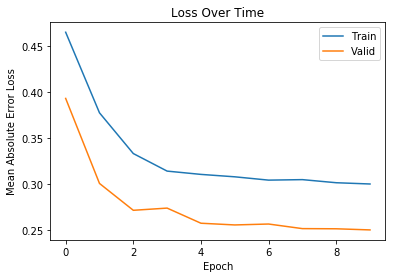

In [10]:
seq2seq.history_plot()

In [11]:
saved_path = path.join(root_folder,"savedSeq2Seq.h5")
seq2seq.save_model(saved_path)

/usr/local/lib/python3.6/dist-packages/keras/engine/network.py:877: UserWarning: Layer lstm_2 was passed non-serializable keyword arguments: {'initial_state': [<tf.Tensor 'input_3:0' shape=(?, 50) dtype=float32>, <tf.Tensor 'input_4:0' shape=(?, 50) dtype=float32>]}. They will not be included in the serialized model (and thus will be missing at deserialization time).
  '. They will not be included '


## Training Convolutional Seq2Seq WaveNet simple

In [12]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [13]:
seq2seq = Seq2SeqConv(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 32)          96        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, None, 32)          2080      
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 32)          208

In [14]:
seq2seq.fit(epochs=10)

(40000, 742, 1)
(40000, 60, 1)
Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 39s 1ms/step - loss: 0.3690 - val_loss: 0.3246
Epoch 2/10
32000/32000 [==============================] - 26s 799us/step - loss: 0.2797 - val_loss: 0.2764
Epoch 3/10
32000/32000 [==============================] - 26s 800us/step - loss: 0.2581 - val_loss: 0.2615
Epoch 4/10
32000/32000 [==============================] - 26s 803us/step - loss: 0.2523 - val_loss: 0.2578
Epoch 5/10
32000/32000 [==============================] - 26s 805us/step - loss: 0.2503 - val_loss: 0.2569
Epoch 6/10
32000/32000 [==============================] - 26s 806us/step - loss: 0.2492 - val_loss: 0.2563
Epoch 7/10
32000/32000 [==============================] - 26s 808us/step - loss: 0.2486 - val_loss: 0.2560
Epoch 8/10
32000/32000 [==============================] - 26s 808us/step - loss: 0.2481 - val_loss: 0.2555
Epoch 9/10
32000/32000 [==============================] - 26s 810u

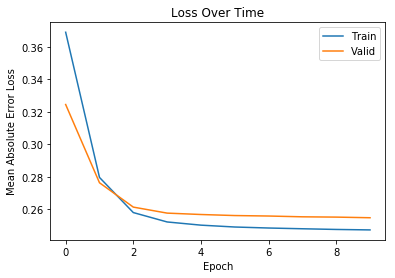

In [15]:
seq2seq.history_plot()

In [ ]:
saved_path = path.join(root_folder,"seqConv.h5")
seq2seq.save_model(saved_path)

## Training Fully Convolutional Seq2Seq WaveNet simple

In [17]:
series = WikiSeriesNN(train_file)

Data ranges from 2015-07-01 to 2017-09-10


In [18]:
seq2seq = Seq2SeqConvFull(series,60)

Train encoding: 2015-07-01 00:00:00 - 2017-05-13 00:00:00
Train prediction: 2017-05-14 00:00:00 - 2017-07-12 00:00:00 

Val encoding: 2015-08-30 00:00:00 - 2017-07-12 00:00:00
Val prediction: 2017-07-13 00:00:00 - 2017-09-10 00:00:00

Encoding interval: 683
Prediction interval: 60
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, None, 1)      0                                            
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, None, 16)     32          input_6[0][0]                    
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, None, 32)     1056        conv1d_12[0][0]                  
_________________________

In [19]:
seq2seq.fit(epochs=10, batch_size= 2 ** 8)

(40000, 742, 1)
(40000, 60, 1)
Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 116s 4ms/step - loss: 0.2683 - val_loss: 0.2580
Epoch 2/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2432 - val_loss: 0.2553
Epoch 3/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2398 - val_loss: 0.2528
Epoch 4/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2373 - val_loss: 0.2481
Epoch 5/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2355 - val_loss: 0.2465
Epoch 6/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2344 - val_loss: 0.2450
Epoch 7/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2335 - val_loss: 0.2442
Epoch 8/10
32000/32000 [==============================] - 104s 3ms/step - loss: 0.2329 - val_loss: 0.2441
Epoch 9/10
32000/32000 [==============================] - 104s 3ms/step 

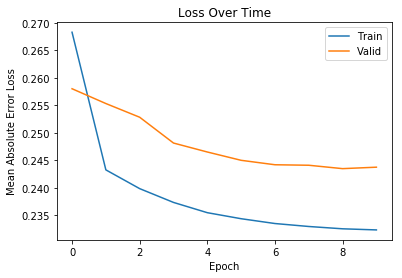

In [22]:
seq2seq.history_plot()

In [ ]:
saved_path = path.join(root_folder,"seqConvFull.h5")
seq2seq.save_model(saved_path)